# DATA3406 W10 Mini Assignment

#### Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Investigating the C4 Ratings data by importing it
df = pd.read_excel('/C4Ratings.xlsx', index_col=0)

# View the first five rows to see what variables are in the data and visualise the values under each variable
df.head()

,CourseID,Timestamp,User,QuestionID,Difficulty,Score
RatingID,,,,,,
46144026,21320,2020-04-30 19:57:37,635978,4470201,0,3
46144058,21320,2020-04-30 20:00:56,635978,4468999,1,3
46162555,21320,2020-05-01 15:43:46,636026,4471345,1,5
46188219,21320,2020-05-03 13:29:05,635990,4472540,1,4
46188241,21320,2020-05-03 13:35:05,635990,4472481,1,3


In [3]:
# Print the data types of each variable
df.dtypes

CourseID       int64
Timestamp     object
User           int64
QuestionID     int64
Difficulty     int64
Score          int64
dtype: object

In [4]:
print('We can see that the variables in the C4 Ratings dataset are all integers except for the Timestamp variable, which is a python object')
print('There are {} rows in the ratings data set'.format(df.shape[0]))
print('There are {} unique questionID'.format(df['QuestionID'].nunique()))

We can see that the variables in the C4 Ratings dataset are all integers except for the Timestamp variable, which is a python object
There are 2233 rows in the ratings data set
There are 501 unique questionID


#### Summarise Ratings Data

In [5]:
# Identify the value range for difficulty
df['Difficulty'].nunique()

3

In [6]:
print('The number of levels in difficulty are 3')

The number of levels in difficulty are 3


In [7]:
# Identify the value range for score
df['Score'].nunique()

6

In [8]:
print('The number of levels in score are 6')

The number of levels in score are 6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5626e0cfd0>]],
      dtype=object)

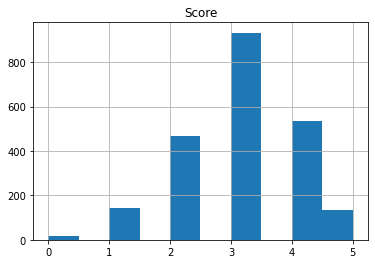

In [9]:
# Plot a histogram of the scores column to see the distribution of score values across all questions
df.hist('Score')

Figure 1: See that the mode of the dataset is a score of 3.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5626e02080>]],
      dtype=object)

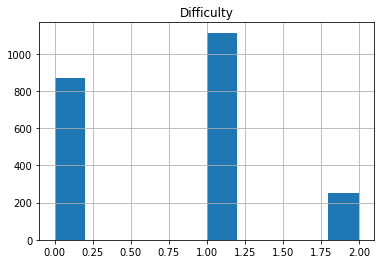

In [10]:
# Plot a histogram of the difficulty column to see the distribution of difficulty values across all questions
df.hist('Difficulty')

Figure 2: See that the mode of the dataset is a difficulty of 1.

#### Ratings Overview



*  We have 2233 rows in the dataset
*  There are 501 questions
*  Each row has a ratingID that corresponde to a questionID
*  The dataset also contains the courseID, timestamp, difficulty and score. As well as, the user who made the rating.





#### Import UserCourses and Tags Data

In [11]:
# Investigating the C4 Tags data by importing it
df2 = pd.read_excel('/C4Tags.xlsx', index_col=0)

#### Driving Question

The driving question is, what are the impacts of the group membership for performance using PeerWise?

In [12]:
# Try to merge the Ratings and Tags datasets using a left join, according to Question ID
df12 = pd.merge(df, df2, on='QuestionID',how='left')

In [13]:
# Convert Tag from data type object to string
df12['Tag'] = df12['Tag'].astype('str') 

# Remove the tag rows that have the duplicate assigned team number too
df12 = df12[~df12.Tag.str.contains(r'\d')]

# Remove NaN
df12.dropna(how='any', inplace=True)

# Print the first 5 rows to visualise what variables are in the merged dataset
df12.head()

,CourseID,Timestamp,User,QuestionID,Difficulty,Score,Tag,TagID
0,21320,2020-04-30 19:57:37,635978,4470201,0,3,Pink,6409737.0
3,21320,2020-04-30 20:00:56,635978,4468999,1,3,Pink,6408243.0
4,21320,2020-05-01 15:43:46,636026,4471345,1,5,Red,6411169.0
7,21320,2020-05-03 13:29:05,635990,4472540,1,4,Brown,6413019.0
9,21320,2020-05-03 13:35:05,635990,4472481,1,3,Brown,6412917.0


How many different sudents are in the merged dataset?

In [14]:
print('There are {} unique students in the merged dataset'.format(df12['User'].nunique()))

There are 243 unique students in the merged dataset


What is the date range of the data?

In [15]:
# Calculate the minimum date in the merged dataset
oldest = pd.to_datetime(df12['Timestamp'].min())

# Calculate the maximum date in the merged dataset
newest = pd.to_datetime(df12['Timestamp'].max())

# While printing, calculating the oldest - newest to find the date range of the dataset
print('The oldest date is {} and the newest date is {}'.format(oldest,newest))
print('This is a date range of {}'.format((newest-oldest)))

The oldest date is 2020-04-28 21:23:18 and the newest date is 2020-05-19 12:27:03
This is a date range of 20 days 15:03:45


What is the median score for each group? 

In [16]:
# Group by team colour (tag) and calculate the median score for each
df12.groupby('Tag')['Score'].mean().sort_values()

Tag
Black     2.844697
Brown     2.871560
Red       2.962209
Pink      2.975758
Blue      3.039007
Green     3.048701
Yellow    3.070796
Purple    3.083333
White     3.157895
Name: Score, dtype: float64

In [17]:
print('We can see that the black group had the lowest median score and white had the highest median score')

We can see that the black group had the lowest median score and white had the highest median score


In [18]:
# Plot a boxplot of tag vs. score. A boxplot was chosen because it helps visualise the interquartile range and any outliers.
px.box(df12, x="Tag", y="Score")

Figure 3: Boxplot comparing each group. We can visually see that black has a lower interquartile range in comparison to all the other groups. Similarly, all groups have amedian near 3. There are outliers for the black, blue and yellow groups.

What is the median difficulty for each group?

In [19]:
# Group by team colour (tag) and calculate the median difficulty for each
df12.groupby('Tag')['Difficulty'].mean().sort_values()

Tag
White     0.660819
Green     0.662338
Red       0.683140
Purple    0.690476
Black     0.693182
Pink      0.724242
Blue      0.741135
Brown     0.752294
Yellow    0.893805
Name: Difficulty, dtype: float64

In [20]:
print('We can see that the white group had the lowest median difficulty rating and yellow had the highest median difficulty rating')

We can see that the white group had the lowest median difficulty rating and yellow had the highest median difficulty rating


In [21]:
# Plot a boxplot of tag vs. score. A boxplot was chosen because it helps visualise the interquartile range and any outliers.
px.box(df12, x="Tag", y="Difficulty")

Figure 4: From the boxplot, we can see that there is not a distinct variation between groups for difficulty rating. Hence, there may be no further investigation into difficulty.

How many questions were rated by each team ?

In [22]:
# Group by team colour and count how many rating were made
df12.groupby(['Tag'])['QuestionID'].count().sort_values()

Tag
Purple     84
White     171
Brown     218
Yellow    226
Black     264
Blue      282
Green     308
Pink      330
Red       344
Name: QuestionID, dtype: int64

In [23]:
print('We can see that the purple group had the lowest number of questions rated and red had the highest number of questions rated')

We can see that the purple group had the lowest number of questions rated and red had the highest number of questions rated


In [24]:
# Plot a boxplot of tag vs. score. A boxplot was chosen because it helps visualise the interquartile range and any outliers.
px.histogram(df12, x="Tag", y="QuestionID")

Figure 5: The histogram looks at the number of questions rated per group. We can see that the purple group had the lowest number of questions rated. Whilst, the red group had the highest number of questions rated near 350. The variation in number of questions may affect the groups exam outcome, which we will continue to investigate.

####Questions dataset

In [73]:
# Investigating the C4 Questions data by importing it
df3 = pd.read_excel('/C4Questions.xlsx', index_col=0)

df3['QuestionID'] = df3.index

df3.head()



,course_id,timestamp,user,avg_rating,total_responses,total_ratings,top_rating_count,avg_difficulty,total_comments,deleted,answer,question,numAlts,altA,altB,altC,altD,altE,explanation,AcademicMark,QuestionID
id,,,,,,,,,,,,,,,,,,,,,
4464532,21320,2020-04-27 18:51:25,635990,3.78,10,9,2,1.2222,8,2,D,Operons are a series of related genes that are...,4,A,B,C,D,NaN,<p>Because the bacteria only wants to make th...,NaN,4464532
4464967,21320,2020-04-27 22:56:37,636029,3.25,7,4,1,0.7500,5,2,D,The sigma (&sigma;) subunit is required for th...,5,The &sigma; subunit decreases the general;affi...,The &sigma; subunit recognizes the promoter se...,The &sigma; subunit can be reused again and ag...,The &sigma; subunit clings onto the core polym...,Binding of the sigma subunit is an important s...,<p>The sigma subunit can direct the tight bin...,NaN,4464967
4468332,21320,2020-04-29 18:19:30,636019,2.80,13,10,0,0.5000,10,0,C,Which of the following answers provides <stron...,4,RNA polymerase has no;proofreading ability to ...,RNA;polymerase has insufficient bases for pair...,RNA polymerase has to trigger mutations that a...,RNA;polymerase has longer strand for transcrip...,NaN,<p>Wrong - Answer A:&nbsp;RNA polymerase has ...,3.0,4468332
4468396,21320,2020-04-29 19:15:16,635992,0.00,0,0,0,0.0000,0,2,B,Rifampicin is an example of an antibiotic that...,5,Initiation; RNA polymerase cannot bind to prom...,Elongation; inability to process RNA synthesis...,Termination; No stop signal can be recognized ...,Elongation; inability to unwind DNA then cause...,None of the above is the correct answer.,<p>The correct answer is B.&nbsp;</p><p>&nbsp...,NaN,4468396
4468400,21320,2020-04-29 19:15:16,635992,2.86,11,7,0,1.0000,8,2,B,Rifampicin is an example of an antibiotic that...,5,Initiation; RNA polymerase cannot bind to prom...,Elongation; inability to process RNA synthesis...,Termination; No stop signal can be recognized ...,Elongation; inability to unwind DNA then cause...,None of the above is the correct answer.,<p>The correct answer is B.&nbsp;</p><p>&nbsp...,NaN,4468400


In [79]:
# Try to merge the Questions and already merged Tags/UserCourses datasets using a left join, according to Question ID
df123 = pd.merge(df12, df3, on='QuestionID',how='left')

# Remove NAs
df123.dropna(inplace=True)

# Determine the dimensions of the dataset
df123.shape

# Find number of questions that each group submitted
Number = df123.groupby(['Tag'])['QuestionID'].count().sort_values()

# Merge the counted number of questions to the dataset
df123 = pd.merge(df123, Number, on='Tag',how='left')

# Change the default merge name to Numquestions
df123 = df123.rename(columns={'QuestionID_y': 'Numquestions'})
df123.head()

,CourseID,Timestamp,User,QuestionID_x,Difficulty,Score,Tag,TagID,course_id,timestamp,user,avg_rating,total_responses,total_ratings,top_rating_count,avg_difficulty,total_comments,deleted,answer,question,numAlts,altA,altB,altC,altD,altE,explanation,AcademicMark,Numquestions
0,21320,2020-05-05 23:00:20,636029,4476565,1,4,Pink,6418744.0,21320,2020-05-05 22:42:04,636041,3.40,13,10,1,1.0000,9,0,D,Which statement is <em><strong>TRUE;</strong><...,5,The antisense strand of DNA shares the same se...,Both uracil and thymine triphosphate are requi...,"The sense strand is known as the ""template"" st...",The antisense strand is responsible for the ge...,DNA polymerase I is the major catalytic produc...,"<p>A) False, as it is the <em><strong>sense</...",4.0,49
1,21320,2020-05-05 23:03:40,636020,4476565,1,3,Pink,6418744.0,21320,2020-05-05 22:42:04,636041,3.40,13,10,1,1.0000,9,0,D,Which statement is <em><strong>TRUE;</strong><...,5,The antisense strand of DNA shares the same se...,Both uracil and thymine triphosphate are requi...,"The sense strand is known as the ""template"" st...",The antisense strand is responsible for the ge...,DNA polymerase I is the major catalytic produc...,"<p>A) False, as it is the <em><strong>sense</...",4.0,49
2,21320,2020-05-06 14:21:39,636007,4471839,1,3,Green,6411967.0,21320,2020-05-01 22:55:40,560375,2.67,10,6,0,0.8333,7,0,B,*Green* A mutation within the regulatory gene ...,5,This would decrease the effectiveness of the e...,This would decrease the effectiveness of the c...,This would have no effect on the functionality...,This would increase the effectiveness of the c...,This would increase the effectiveness of the e...,<p>A decrease in binding affinity of the repr...,4.0,52
3,21320,2020-05-06 15:29:44,635992,4476565,0,2,Pink,6418744.0,21320,2020-05-05 22:42:04,636041,3.40,13,10,1,1.0000,9,0,D,Which statement is <em><strong>TRUE;</strong><...,5,The antisense strand of DNA shares the same se...,Both uracil and thymine triphosphate are requi...,"The sense strand is known as the ""template"" st...",The antisense strand is responsible for the ge...,DNA polymerase I is the major catalytic produc...,"<p>A) False, as it is the <em><strong>sense</...",4.0,49
4,21320,2020-05-06 19:26:11,636032,4476565,1,4,Pink,6418744.0,21320,2020-05-05 22:42:04,636041,3.40,13,10,1,1.0000,9,0,D,Which statement is <em><strong>TRUE;</strong><...,5,The antisense strand of DNA shares the same se...,Both uracil and thymine triphosphate are requi...,"The sense strand is known as the ""template"" st...",The antisense strand is responsible for the ge...,DNA polymerase I is the major catalytic produc...,"<p>A) False, as it is the <em><strong>sense</...",4.0,49


After removal of NAs, the merged dataset has 373 rows. That is, 373 questions in the dataset.

In [57]:
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

top_N = 50

# replace all non-alphanumeric characters
df123['sub_rep'] = df123.question.str.lower().str.replace('\W', ' ')

# tokenize
df123['tok'] = df123.sub_rep.apply(nltk.tokenize.word_tokenize)

# all tokenized words to a list
words = df123.tok.tolist()  # this is a list of lists
words = [word for list_ in words for word in list_]

# frequency distribution
word_dist = nltk.FreqDist(words)

# remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords)

# output the results
rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])


33      [which, statement, is, em, strong, true, stron...
34      [which, statement, is, em, strong, true, stron...
42      [green, a, mutation, within, the, regulatory, ...
45      [which, statement, is, em, strong, true, stron...
47      [which, statement, is, em, strong, true, stron...
                              ...                        
2214    [which, of, the, following, is, false, of, the...
2217    [consider, the, trna, 5, gcu, 3, which, codon,...
2220    [if, three, proteins, in, translation, individ...
2225    [which, of, the, following, would, lead, to, a...
2226    [how, does, the, shine, dalgarno, sequence, ac...
Name: tok, Length: 373, dtype: object


In [28]:
print(rslt)

             Word  Frequency
0             the        945
1              of        576
2              is        360
3           which        292
4              in        288
5              to        278
6          strong        269
7               a        267
8             and        208
9       following        193
10  transcription        146
11            are        113
12            rna         98
13           mrna         96
14             br         82
15           that         82
16              5         73
17     statements         71
18             be         70
19            dna         69
20            for         69
21     eukaryotic         69
22       sequence         67
23           gene         62
24          about         62
25           this         61
26           from         60
27           what         59
28           have         58
29            not         54
30           span         54
31     processing         54
32           true         53
33      promot

In [83]:
# Subset the data to only have the question, academic mark and group colour
df123_rslt = df123[['question','AcademicMark','Tag','Numquestions']]

df123_rslt['question'] = df123_rslt.question.str.lower().str.replace('\W', ' ')

# Split the question string into individual words
df123_rslt['question'] = df123_rslt['question'].str.split(None,expand=True)

# Using plotly express, we produce a bar plot of the word, academic mark and colour organise it by group tag
px.bar(df123_rslt,df123_rslt['question'],df123_rslt['AcademicMark'],color=df123_rslt['Tag'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
# Plot a box plot to gain some statistical summary on what each word in the question has on the academic mark.
px.box(df123_rslt, x="question", y="AcademicMark")

From the boxplot, we can see that the word with the greatest range is 'which' and 'what'. The words with the smallest range and yet the highest academic mark is menopause, unlike, ing, 5, below, fill, researchers, as, mrna and jade.

In [89]:
# We will now look into the number of questions submitted and its impact on academic mark
px.box(df123_rslt, x="Numquestions", y="AcademicMark")

The boxplot indicates that having a higher number of questions does not necessarily infer a higher academic mark. The highest median for academic mark relates to the lowest number of questions submitted.